In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import os

In [4]:
pwd

'/Users/obinnadinneya/Desktop/KAGGLE FOLDER'

In [5]:
#list all files in a directory 
#you can use a for loop to open all files in the directory too
os.listdir()

['Exploratory data analysis for Data science salaries .ipynb',
 '.DS_Store',
 'car-price-using-linear-regression.ipynb',
 'house prices model predictor project from KAGGLE USING LINEAR REGRESSION.ipynb',
 'test.csv',
 'ds_salaries.csv',
 'submission.csv',
 'data_description.txt',
 'Titanic dataset prediction .ipynb',
 'train.csv',
 '.ipynb_checkpoints',
 'gender_submission.csv',
 'sample_submission.csv']

In [6]:
housing_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#print the dimension/shape of the dataframe
housing_df.shape

(1460, 81)

In [9]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#removing the ID column
housing_df.drop("Id",axis = 1 ,inplace = True)

<AxesSubplot:>

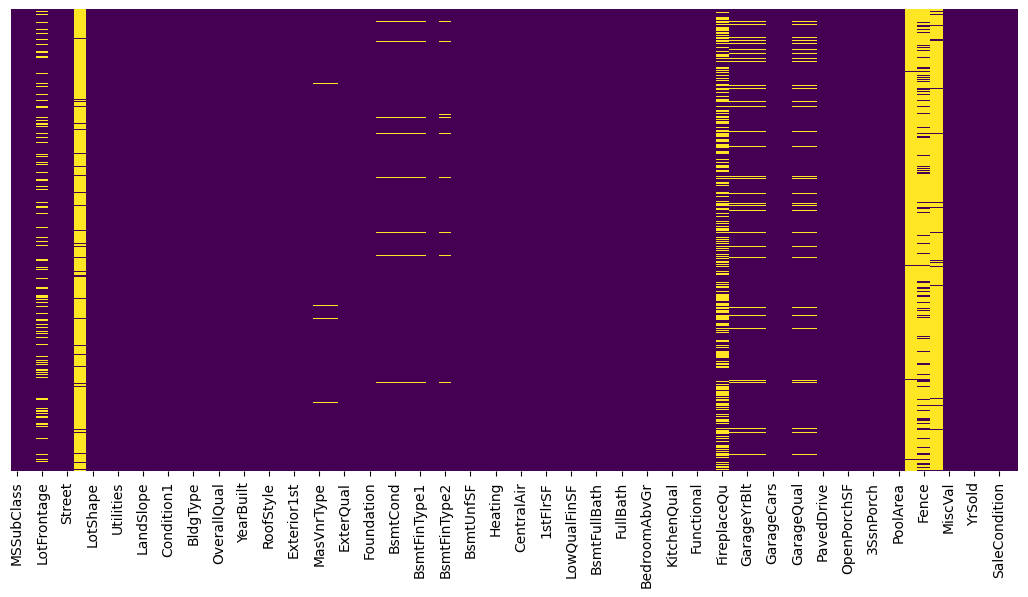

In [11]:
plt.figure(figsize=(13,6))
sns.heatmap(housing_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [12]:
housing_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [13]:
null_df = housing_df.isnull().sum()*100/len(housing_df)

In [14]:
null_df

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [15]:
#print columns that have values > 25%
#this shows the less influential variables 
null_df[null_df.values > 25].index

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [16]:
housing_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1,
               inplace = True)

In [17]:
null_df[(null_df.values <= 25) & (null_df.values > 0)]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [18]:
housing_df['LotFrontage'].median()

69.0

In [19]:
#since there are still quite a bit of missing vaues in lotfrontage 
#we can fill it in with the median value 

housing_df['LotFrontage'].fillna(69.0,inplace = True)

In [20]:
#returning location where msvnrarea is null as a data frame but for only
#MasVnrArea','MasVnrType columns

housing_df.loc[housing_df.MasVnrArea.isnull(),['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [21]:
housing_df[['MasVnrArea','MasVnrType']].head()

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,None
2,162.0,BrkFace
3,0.0,None
4,350.0,BrkFace


In [22]:
#now that we know where the area is null the type is also null
#fill in the values 
housing_df.MasVnrArea.fillna(0,inplace = True)
housing_df.MasVnrType.fillna('None', inplace = True)

In [23]:
housing_df[['GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,2003.0,RFn,TA,TA
1,1976.0,RFn,TA,TA
2,2001.0,RFn,TA,TA
3,1998.0,Unf,TA,TA
4,2000.0,RFn,TA,TA
...,...,...,...,...
1455,1999.0,RFn,TA,TA
1456,1978.0,Unf,TA,TA
1457,1941.0,RFn,TA,TA
1458,1950.0,Unf,TA,TA


In [24]:
housing_df.loc[housing_df.GarageType.isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


Considering that the garage is empty for these houses 

In [25]:
housing_df.GarageType.fillna('None', inplace=True)
housing_df.GarageYrBlt.fillna(0, inplace=True)
housing_df.GarageFinish.fillna('None', inplace=True)
housing_df.GarageQual.fillna('None', inplace=True)
housing_df.GarageCond.fillna('None', inplace=True)

In [26]:
#removing all rows with Na, NaN , null values
housing_df.dropna(inplace = True)

In [27]:
#check if there are any na values left 
#should return an empty series 
null_df = housing_df.isnull().sum()
null_df[null_df.values > 0]

Series([], dtype: int64)

<AxesSubplot:>

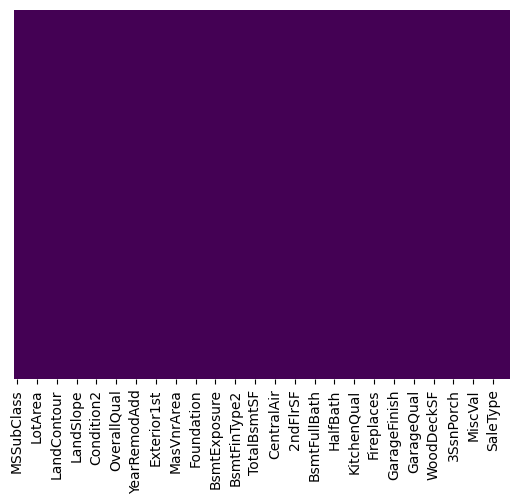

In [28]:
sns.heatmap(housing_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [29]:
#we can ask for a statistical summary of each column and specify
#the percentile
#Adding .T allows us to view the columns as rows and vice versa 
housing_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T


,count,mean,std,min,0%,1%,5%,10%,25%,50%,75%,90%,95%,99%,100%,max
MSSubClass,1420.0,56.799296,42.268545,20.0,20.0,20.00,20.00,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0,190.0
LotFrontage,1420.0,69.952817,22.276497,21.0,21.0,21.00,35.00,48.0,60.00,69.0,79.00,92.0,105.00,137.81,313.0,313.0
LotArea,1420.0,10546.640845,10104.687606,1300.0,1300.0,1680.00,3228.30,4992.8,7583.00,9500.0,11628.50,14442.8,17426.85,38609.24,215245.0,215245.0
OverallQual,1420.0,6.145070,1.359361,1.0,1.0,3.00,4.00,5.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0,10.0
OverallCond,1420.0,5.591549,1.110238,1.0,1.0,3.00,4.00,5.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0,9.0
YearBuilt,1420.0,1971.582394,30.378484,1872.0,1872.0,1898.38,1916.00,1924.0,1954.00,1973.5,2001.00,2006.0,2007.00,2009.00,2010.0,2010.0
YearRemodAdd,1420.0,1985.281690,20.454376,1950.0,1950.0,1950.00,1950.00,1950.0,1968.00,1994.0,2004.00,2007.0,2007.00,2009.00,2010.0,2010.0
MasVnrArea,1420.0,104.773239,181.996947,0.0,0.0,0.00,0.00,0.0,0.00,0.0,168.00,336.0,456.00,794.48,1600.0,1600.0
BsmtFinSF1,1420.0,455.345070,456.088615,0.0,0.0,0.00,0.00,0.0,0.00,400.0,725.00,1074.4,1274.15,1572.81,5644.0,5644.0
BsmtFinSF2,1420.0,47.523239,162.988333,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,123.2,400.55,837.58,1474.0,1474.0


### To remove outliers which are +-3 standard deviations away from the mean you would have to get rid of anything above the 99 percentile since we only have positive values 

In [30]:
#excluded object datatypes and printed, assigned a list of non- object
#columns
number_cols = housing_df.select_dtypes(exclude= 'object').columns
number_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
np.percentile(housing_df['MSSubClass'],99)

190.0

### In order to exclude anything higher than 99% of each int/float column then what we have to do is change the value to be the 99%tile value using a for loop 

In [32]:
type(number_cols)

pandas.core.indexes.base.Index

In [33]:
num_cols = list(number_cols)

### since the variable above is an index not a list to iterate through we have to convert it to a list when we are calling the for loop

In [34]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [35]:
for i in num_cols:
    housing_df.loc[housing_df[i] >= np.percentile(housing_df[i], 99),i] = np.percentile(housing_df[i], 99)
    

In [36]:
housing_df[num_cols].describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

,count,mean,std,min,0%,1%,5%,10%,25%,50%,75%,90%,95%,99%,100%,max
MSSubClass,1420.0,56.799296,42.268545,20.0,20.0,20.00,20.00,20.0,20.00,50.0,70.00,120.0,160.00,190.0000,190.00,190.00
LotFrontage,1420.0,69.541655,19.804766,21.0,21.0,21.00,35.00,48.0,60.00,69.0,79.00,92.0,105.00,137.6561,137.81,137.81
LotArea,1420.0,10090.120141,5164.705843,1300.0,1300.0,1680.00,3228.30,4992.8,7583.00,9500.0,11628.50,14442.8,17426.85,38208.4844,38609.24,38609.24
OverallQual,1420.0,6.145070,1.359361,1.0,1.0,3.00,4.00,5.0,5.00,6.0,7.00,8.0,8.00,10.0000,10.00,10.00
OverallCond,1420.0,5.591549,1.110238,1.0,1.0,3.00,4.00,5.0,5.00,5.0,6.00,7.0,8.00,9.0000,9.00,9.00
YearBuilt,1420.0,1971.581690,30.377604,1872.0,1872.0,1898.38,1916.00,1924.0,1954.00,1973.5,2001.00,2006.0,2007.00,2009.0000,2009.00,2009.00
YearRemodAdd,1420.0,1985.277465,20.449368,1950.0,1950.0,1950.00,1950.00,1950.0,1968.00,1994.0,2004.00,2007.0,2007.00,2009.0000,2009.00,2009.00
MasVnrArea,1420.0,102.233239,168.872664,0.0,0.0,0.00,0.00,0.0,0.00,0.0,168.00,336.0,456.00,793.2488,794.48,794.48
BsmtFinSF1,1420.0,450.095880,428.405742,0.0,0.0,0.00,0.00,0.0,0.00,400.0,725.00,1074.4,1274.15,1572.6561,1572.81,1572.81
BsmtFinSF2,1420.0,45.394155,150.113930,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,123.2,400.55,834.8098,837.58,837.58


- We can now see that the 99%, 100%tile and max are all the same eliminating the oultiers 

- Also pool area has zero as the mean so lets get rid of it 

In [37]:
housing_df.drop('PoolArea',axis = 1, inplace = True)
num_cols = housing_df.select_dtypes(exclude='object').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
#categorical columns 

cat_cols = housing_df.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
#here we want to print out the value count in eah categorical column

# normalize used to get the percentage 
for i in list(cat_cols):
    print(housing_df[i].value_counts(normalize=True))
    print('**********************************')
    

RL         0.785915
RM         0.150704
FV         0.045775
RH         0.010563
C (all)    0.007042
Name: MSZoning, dtype: float64
**********************************
Pave    0.995775
Grvl    0.004225
Name: Street, dtype: float64
**********************************
Reg    0.628169
IR1    0.336620
IR2    0.028169
IR3    0.007042
Name: LotShape, dtype: float64
**********************************
Lvl    0.897887
Bnk    0.042958
HLS    0.035211
Low    0.023944
Name: LandContour, dtype: float64
**********************************
AllPub    0.999296
NoSeWa    0.000704
Name: Utilities, dtype: float64
**********************************
Inside     0.719014
Corner     0.180986
CulDSac    0.064789
FR2        0.032394
FR3        0.002817
Name: LotConfig, dtype: float64
**********************************
Gtl    0.945775
Mod    0.045070
Sev    0.009155
Name: LandSlope, dtype: float64
**********************************
NAmes      0.151408
CollgCr    0.104930
OldTown    0.078169
Edwards    0.062676
Somers

Look through the value count and if you see maybe two categories or few where theres big disparity 
delete that because it wont have a big influence on price 

In [40]:
drop_cols = ['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir','Electrical','Functional',
             'PavedDrive','GarageCond','GarageQual','LandContour']

In [41]:
housing_df.drop(columns=drop_cols, inplace=True)

In [42]:
cat_cols = housing_df.select_dtypes(include='object').columns

In [43]:
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [44]:
housing_df.MSZoning = housing_df.MSZoning.apply(lambda x: 'other' if x not in ('RL','RM') else x)
housing_df.LotShape = housing_df.LotShape.apply(lambda x: 'other' if x not in ('Reg','IR1') else x)
housing_df.LotConfig = housing_df.LotConfig.apply(lambda x: 'other' if x not in ('Inside','Corner') else x)
housing_df.Condition1 = housing_df.Condition1.apply(lambda x: 'other' if x not in ('Norm') else x)
housing_df.BldgType = housing_df.BldgType.apply(lambda x: 'other' if x not in ('1Fam') else x)
housing_df.HouseStyle = housing_df.HouseStyle.apply(lambda x: 'other' if x not in ('1Story','2Story','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.Exterior1st = housing_df.Exterior1st.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.Exterior2nd = housing_df.Exterior2nd.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.MasVnrType = housing_df.MasVnrType.apply(lambda x: 'other' if x not in ('None','none','BrkFace') else x)
housing_df.ExterQual = housing_df.ExterQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.ExterCond = housing_df.ExterCond.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.Foundation = housing_df.Foundation.apply(lambda x: 'other' if x not in ('PConc','CBlock','BrkTil') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtExposure = housing_df.BsmtExposure.apply(lambda x: 'other' if x not in ('No','Av') else x)
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.apply(lambda x: 'other' if x not in ('Unf','GLQ','ALQ','BLQ') else x)
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.apply(lambda x: 'other' if x not in ('Unf') else x)
housing_df.HeatingQC = housing_df.HeatingQC.apply(lambda x: 'other' if x not in ('Ex','TA') else x)
housing_df.KitchenQual = housing_df.KitchenQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.SaleType = housing_df.SaleType.apply(lambda x: 'other' if x not in ('WD') else x)
housing_df.SaleCondition = housing_df.SaleCondition.apply(lambda x: 'other' if x not in ('Normal') else x)

In [45]:
def year_to_cat(x):
    if x==0:
        return 'None'
    elif x < 1930:
        return 'lt_1930'
    elif x > 1930 and x <= 1960:
        return 'btw_30_60'
    elif x > 1960 and x <= 1990:
        return 'btw_60_90'
    elif x > 1990:
        return 'gt_90'


In [46]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].apply(lambda x: year_to_cat(x))

In [47]:
cat_cols = housing_df.select_dtypes(include='object').columns
num_cols = housing_df.select_dtypes(exclude='object').columns

In [48]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

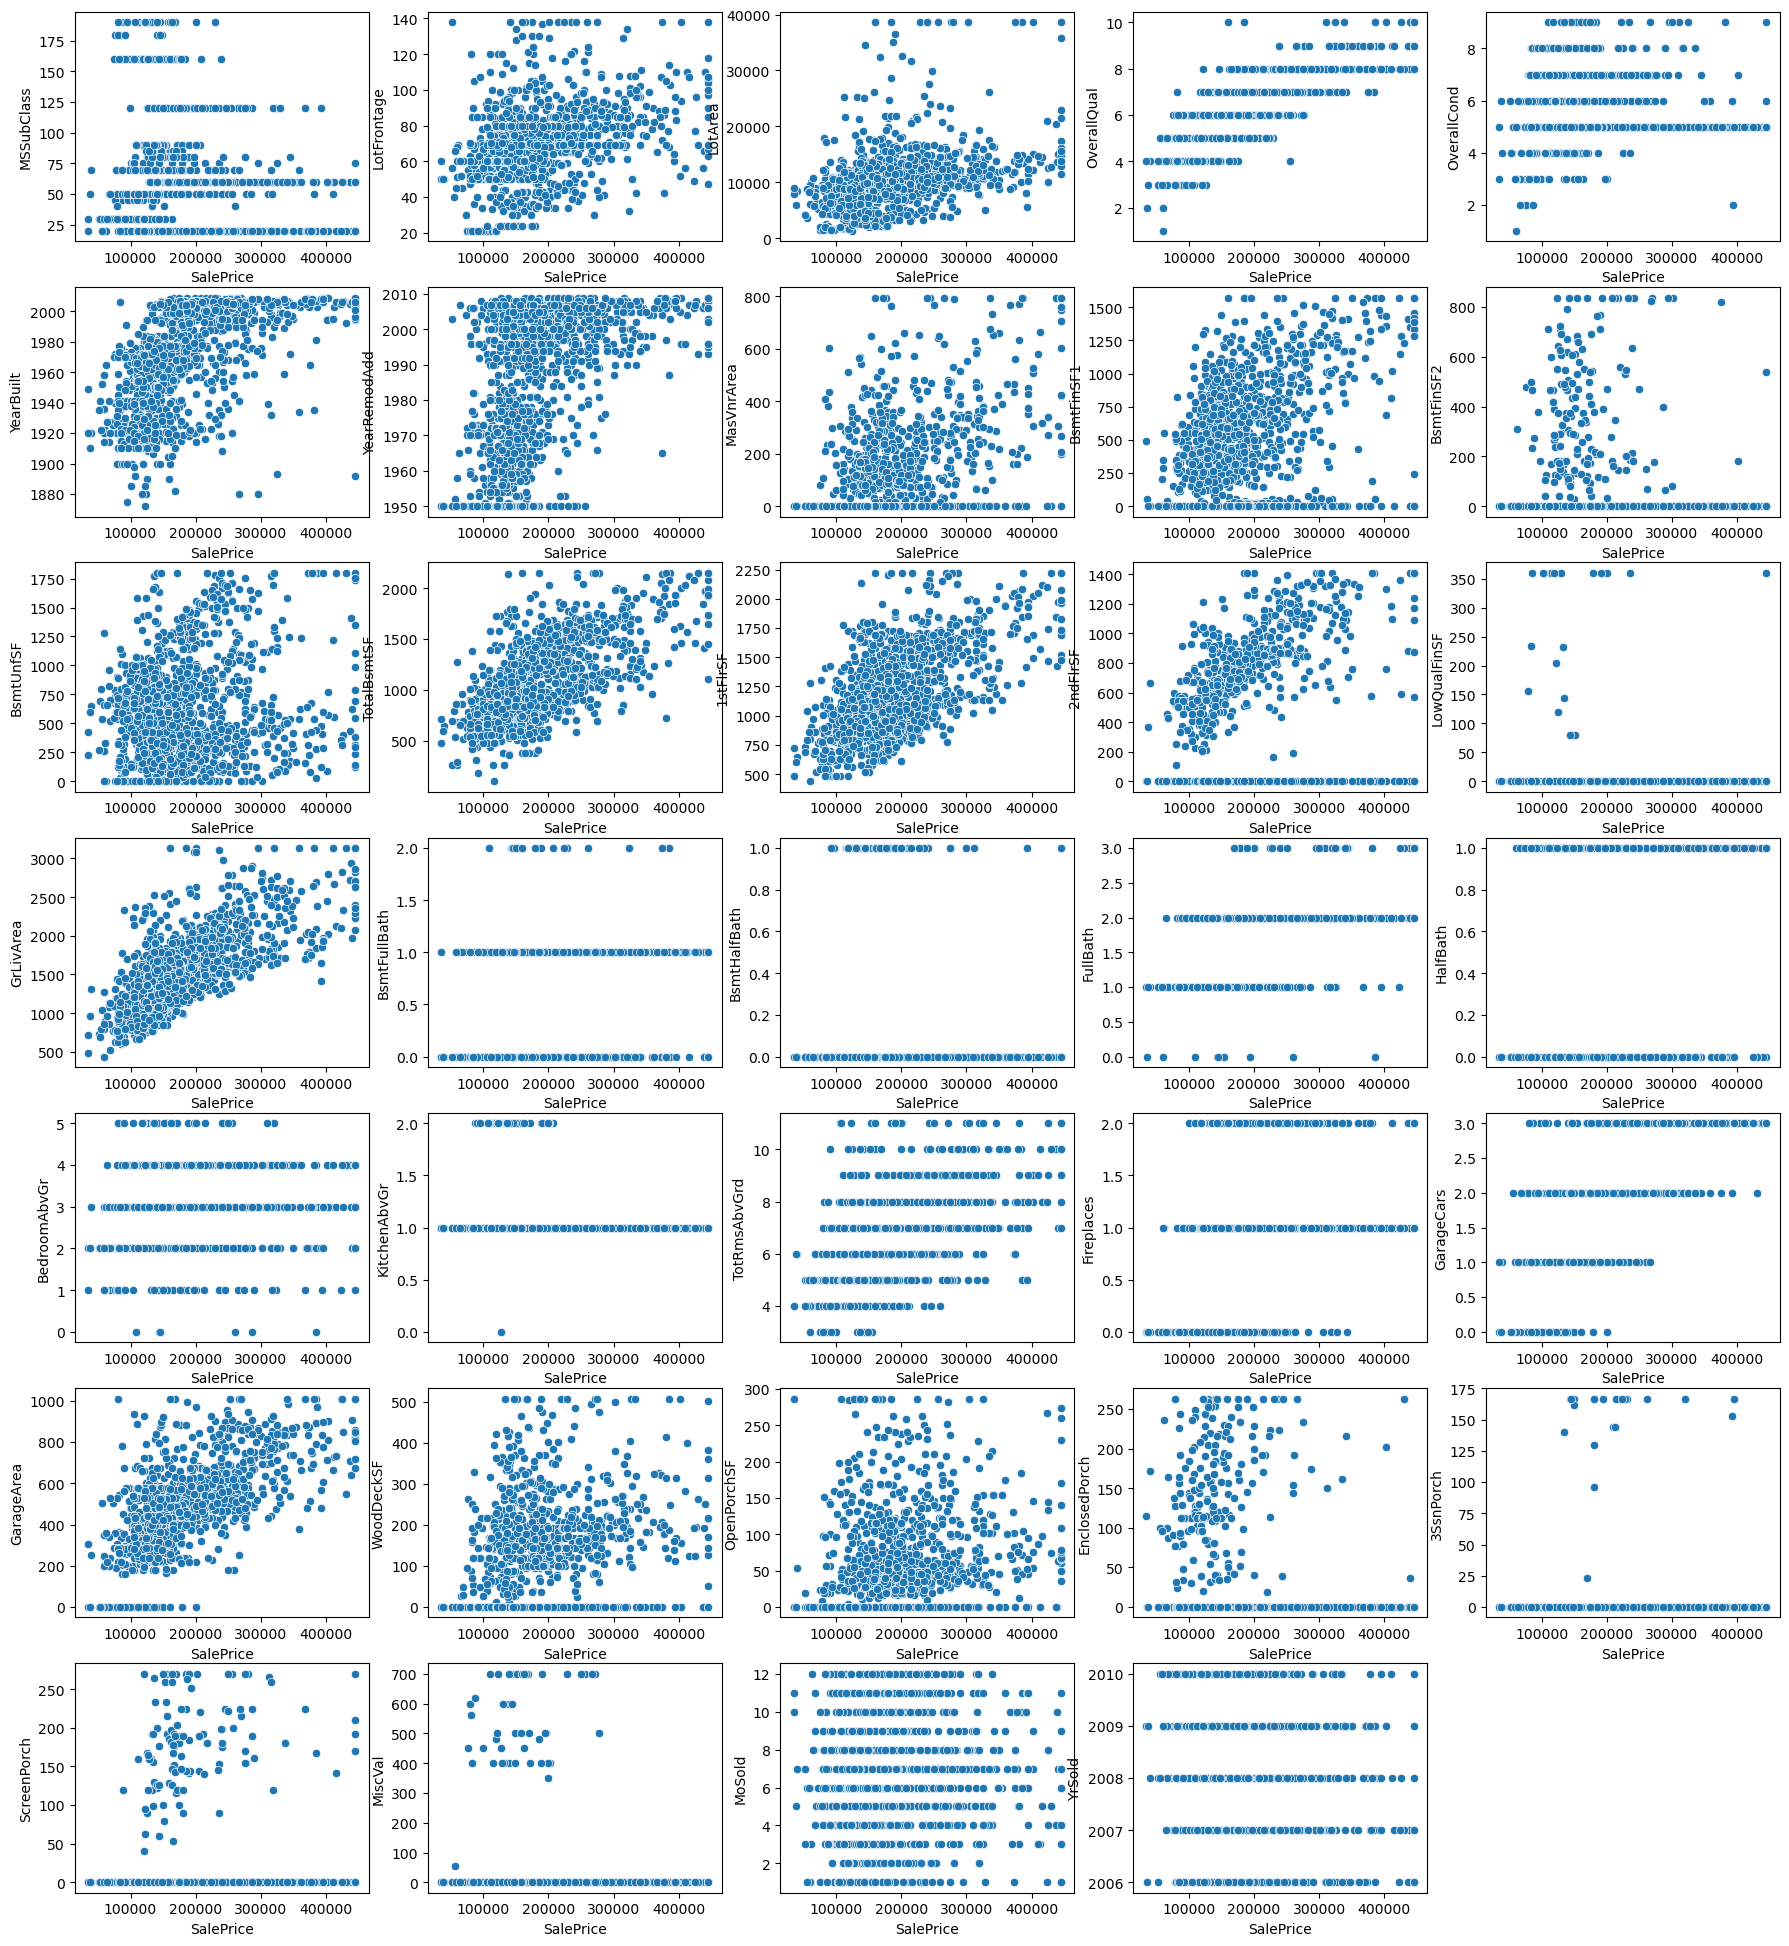

In [49]:
plt.figure(figsize=(22,28))
for i,j in zip(num_cols[:-1], range(len(num_cols[:-1]))):
    plt.subplot(8,5,j+1)
    sns.scatterplot(data=housing_df, x='SalePrice', y=i)
plt.show()

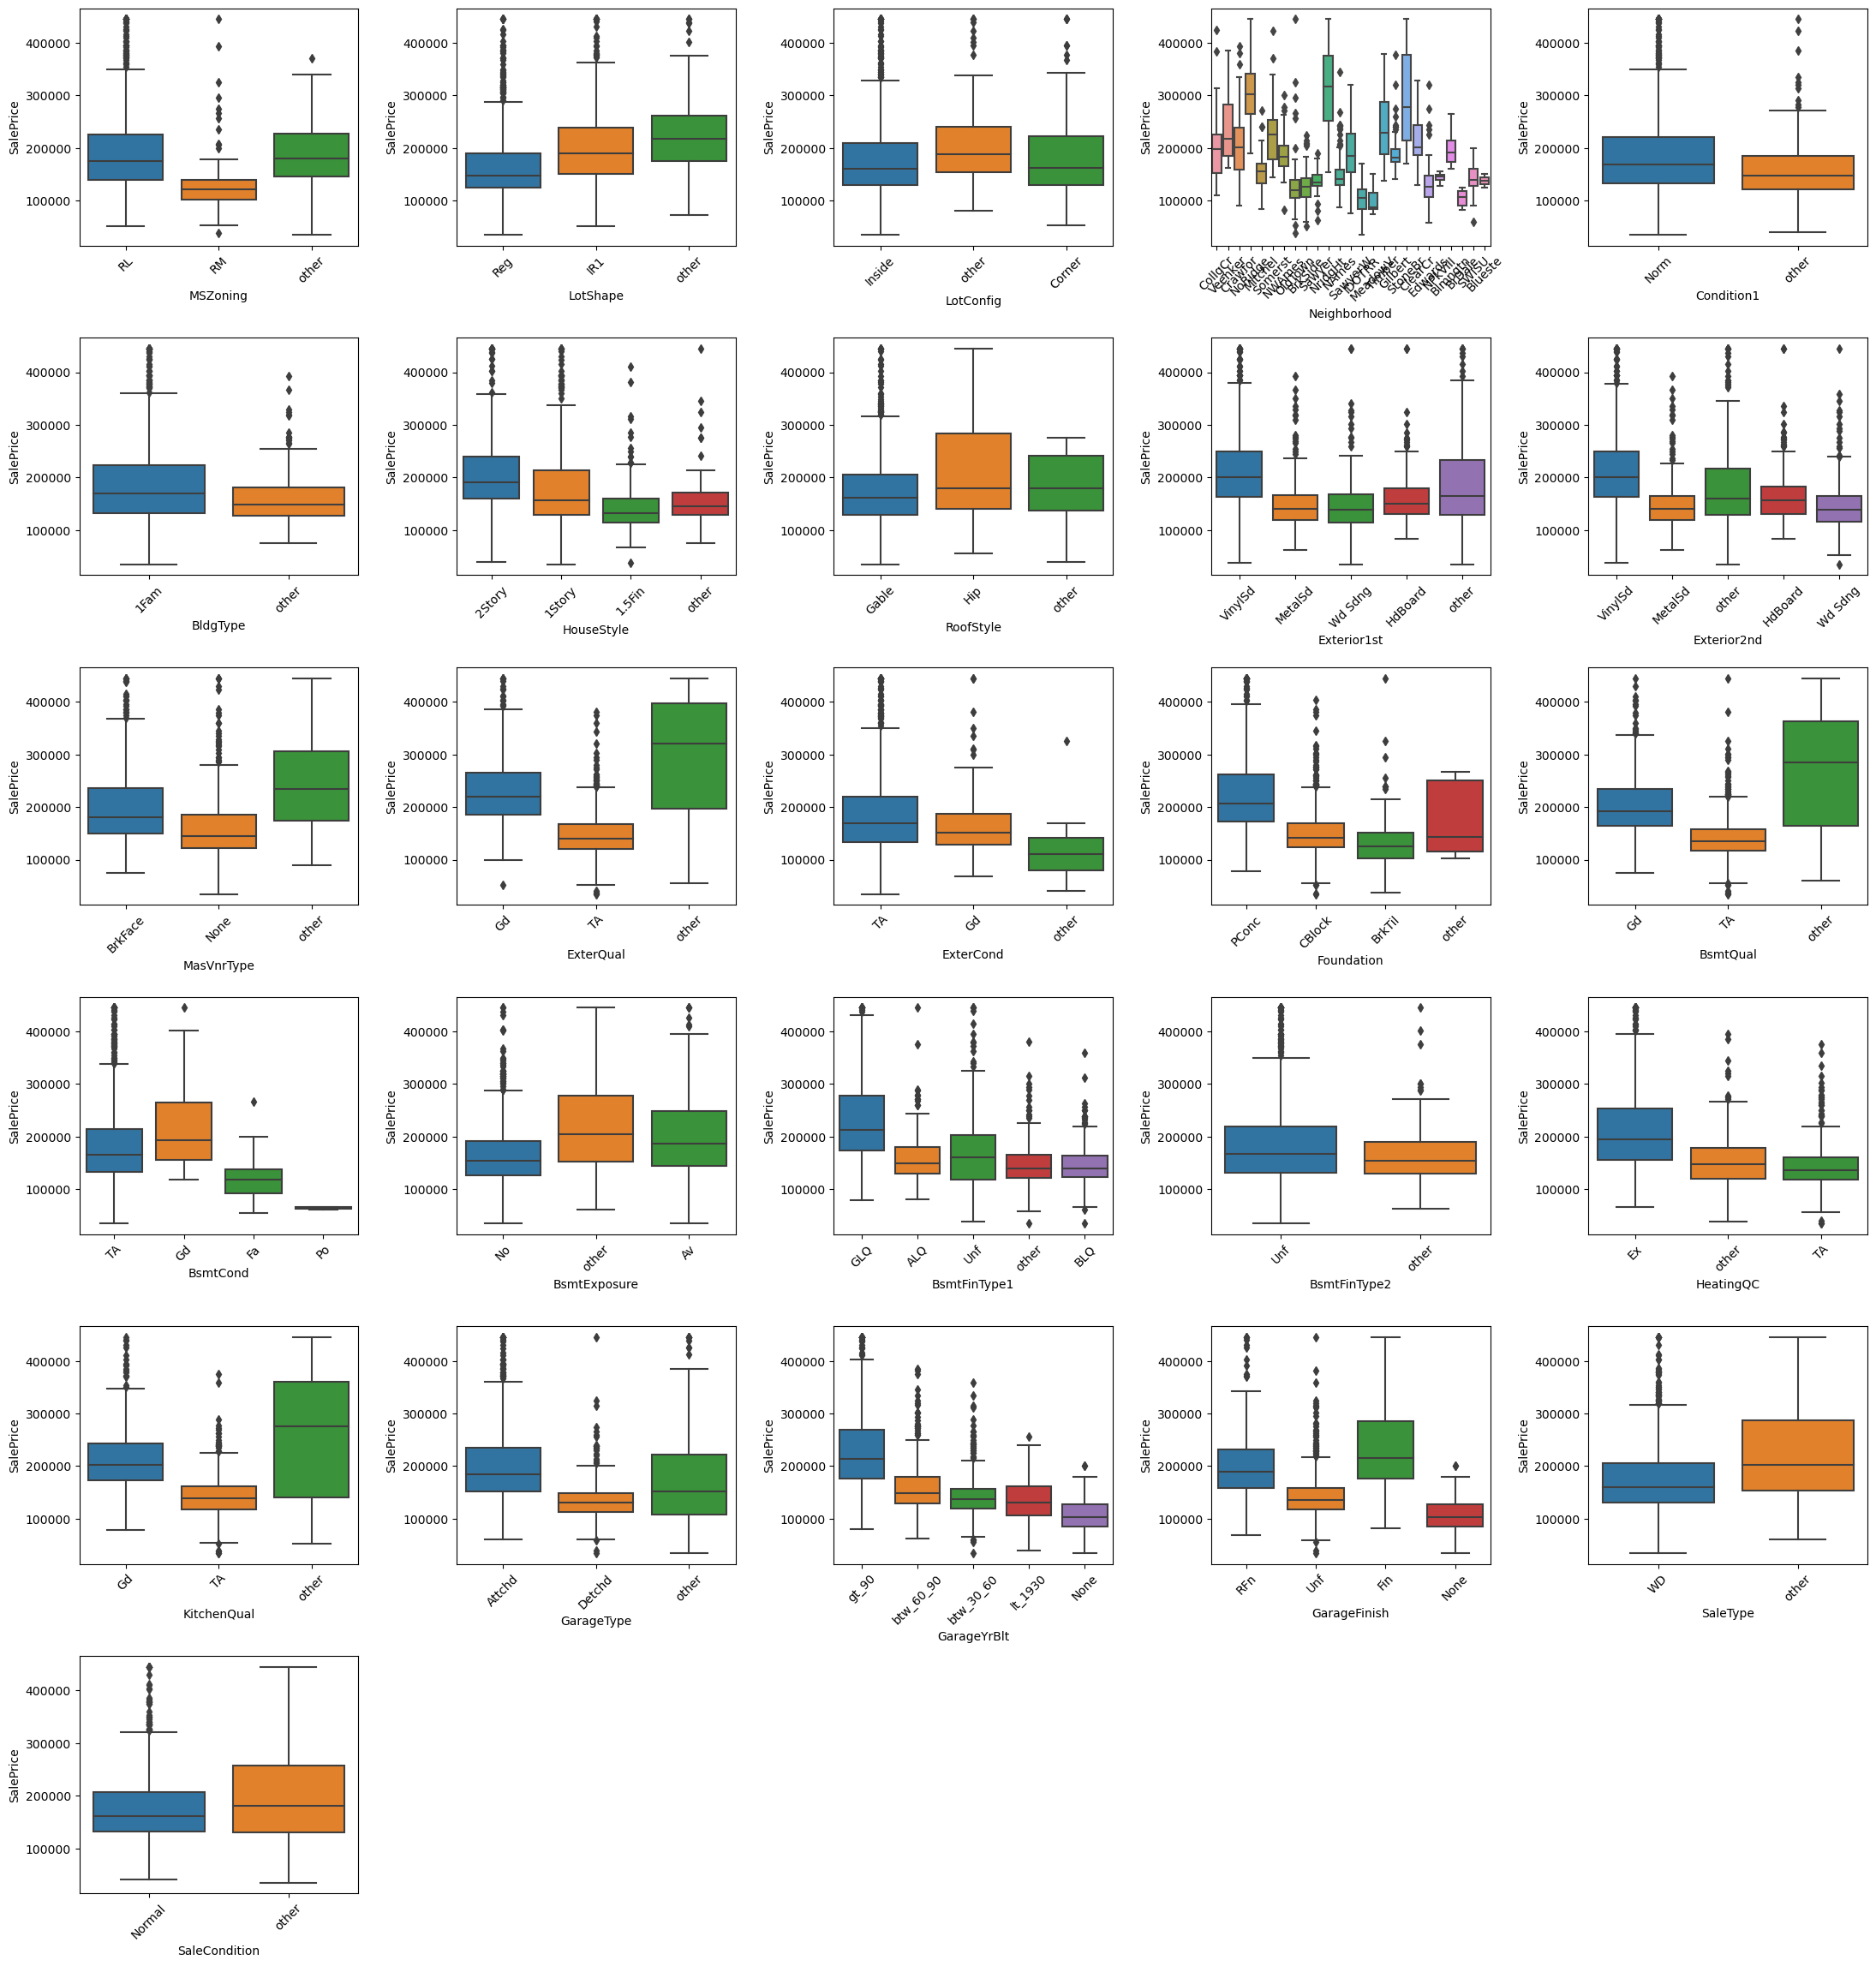

In [50]:
plt.figure(figsize=(22,30))
for i,j in zip(cat_cols, range(len(cat_cols))):
    plt.subplot(8,5,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=housing_df, y='SalePrice', x=i)
plt.tight_layout()

<AxesSubplot:>

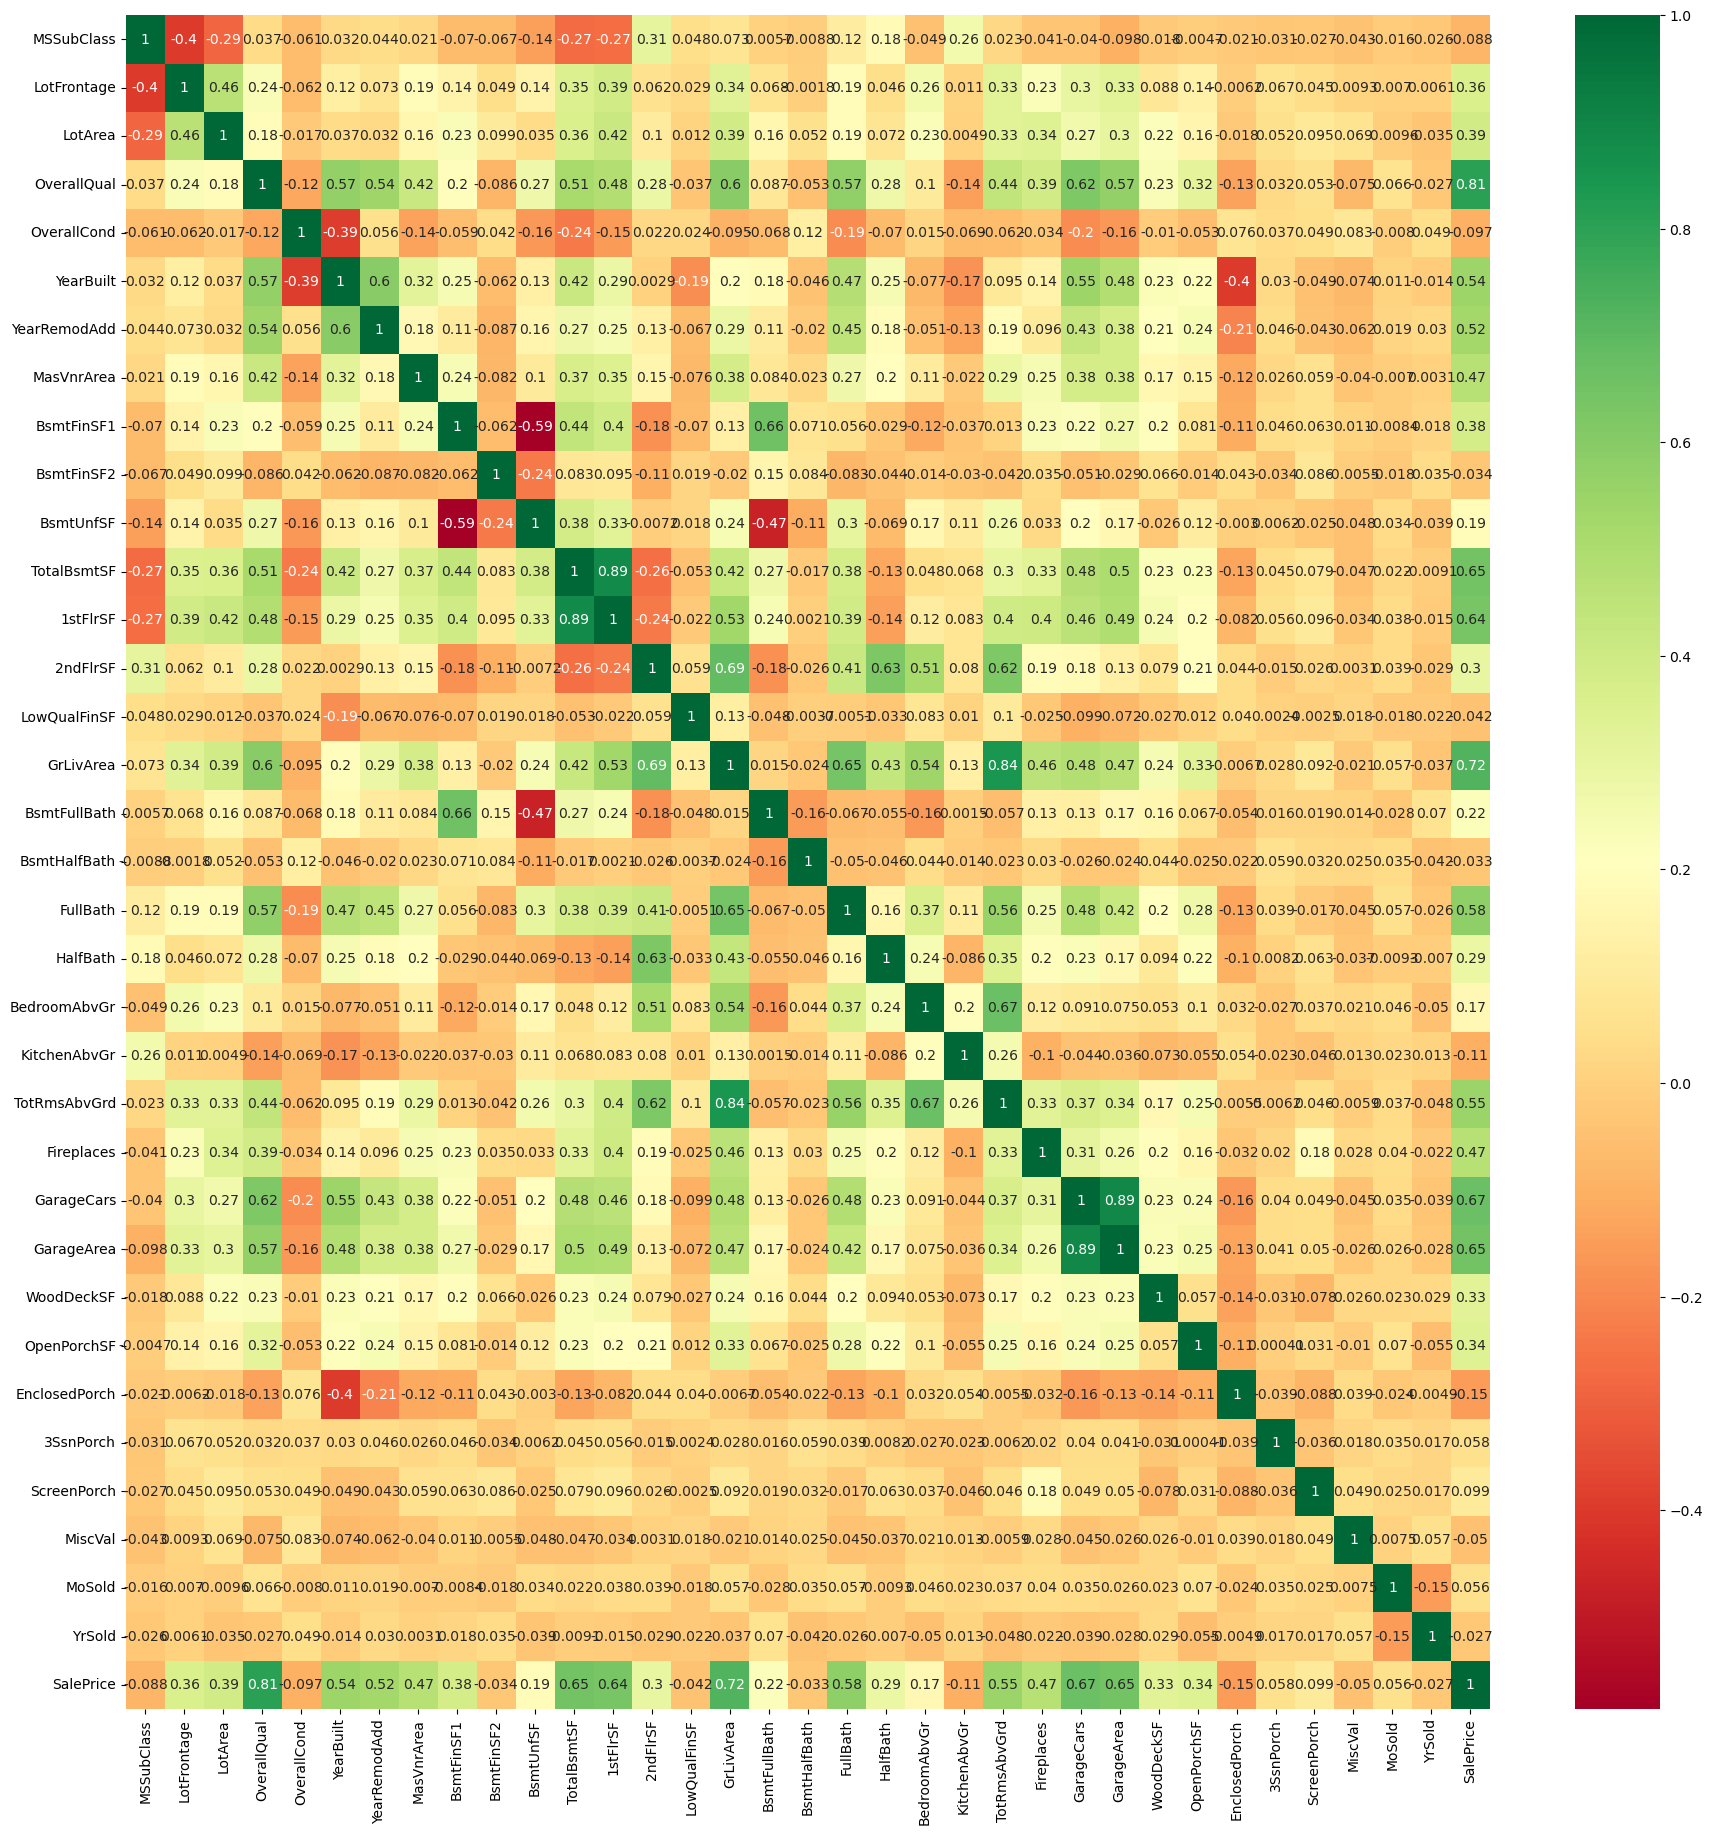

In [51]:
plt.figure(figsize=(22,22))
sns.heatmap(housing_df.corr(),cmap='RdYlGn', annot=True)

In [52]:
housing_df.drop(columns='Neighborhood',inplace=True)
housing_df.reset_index(drop=True,inplace=True)

In [53]:
cat_cols = housing_df.select_dtypes(include='object').columns

In [54]:
print(num_cols,cat_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object') Index(['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [55]:
#lets create a new data frame with only dummmy categorical data and num columns 

dummies_df = housing_df[num_cols]

for i in cat_cols:
    temp = pd.get_dummies(housing_df[i],drop_first=True)
    dummies_df = pd.concat([dummies_df,temp],axis=1)

dummies_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,other,btw_30_60,btw_60_90,gt_90,lt_1930,None,RFn,Unf,other,other
0,60,65.0,8450.0,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,20,80.0,9600.0,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,1,0,0,0
2,60,68.0,11250.0,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,1,0,0,0
3,70,60.0,9550.0,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260.0,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [56]:
dummies_df.shape

(1420, 92)

## Lets split our data , Train our linear model , predict house sales and Evaluate model

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = dummies_df.drop(columns='SalePrice')

In [59]:
y = dummies_df['SalePrice']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

In [64]:
#PREDICTIONS 
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

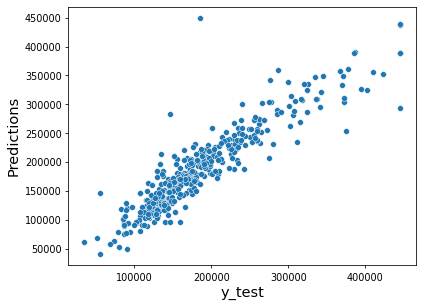

In [65]:
plt.figure(dpi=70)
g=sns.scatterplot(x=y_test,y=predictions)
g.set_xlabel('y_test',fontdict={'size':15})
g.set_ylabel('Predictions',fontdict={'size':15})

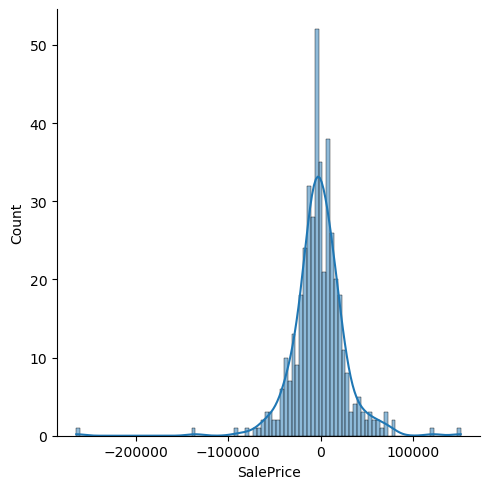

In [66]:
sns.displot(y_test-predictions,bins=100,kde=True,)

In [67]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predictions)

MSE = metrics.mean_squared_error(y_test,predictions)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 19252.916203079298
MSE: 877221390.212721
RMSE: 29617.923462199728
R^2: 0.8408386586699146


Average Saleprice = $182000

In [68]:
cdf = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficients'])

In [69]:
cdf

,Coefficients
MSSubClass,32.043316
LotFrontage,-85.282548
LotArea,0.709214
OverallQual,10270.092687
OverallCond,7345.520653
...,...
None,-2492.790736
RFn,-1923.756048
Unf,-475.088697
other,9100.029610


In [70]:
dummies_df.shape

(1420, 92)

In [71]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Inside,Norm,1Fam,2Story,7,...,61.0,0.00,0.0,0.0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Reg,other,other,1Fam,1Story,6,...,0.0,0.00,0.0,0.0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Inside,Norm,1Fam,2Story,7,...,42.0,0.00,0.0,0.0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,IR1,Corner,Norm,1Fam,2Story,7,...,35.0,263.05,0.0,0.0,0,2,2006,WD,other,140000.0
4,60,RL,84.0,14260.0,IR1,other,Norm,1Fam,2Story,8,...,84.0,0.00,0.0,0.0,0,12,2008,WD,Normal,250000.0


In [72]:
num_cols = num_cols.drop('SalePrice')

In [73]:
#try some PCA PRINCIPLE CONCEPT 
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(housing_df[num_cols])

StandardScaler()

In [76]:
scaled_numdata = scaler.transform(housing_df[num_cols])

In [77]:
scaled_numdata

array([[ 0.07574975, -0.2294021 , -0.317675  , ..., -0.18262048,
        -1.59623017,  0.14339689],
       [-0.87091383,  0.52825816, -0.09493141, ..., -0.18262048,
        -0.48964912, -0.61076451],
       [ 0.07574975, -0.07787005,  0.22465723, ..., -0.18262048,
         0.98579227,  0.14339689],
       ...,
       [ 0.31241565, -0.17889141, -0.20301048, ...,  6.65601563,
        -0.48964912,  1.65171968],
       [-0.87091383, -0.07787005, -0.07226967, ..., -0.18262048,
        -0.85850947,  1.65171968],
       [-0.87091383,  0.27570474, -0.02965785, ..., -0.18262048,
        -0.12078878,  0.14339689]])

In [78]:
#Apply PCA to numcols scaled data 
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=2)

In [80]:
pca.fit(scaled_numdata)

PCA(n_components=2)

In [81]:
num_pca = pca.transform(scaled_numdata)

In [82]:
num_pca

array([[ 1.13385003,  0.74857829],
       [-0.01957842, -1.30147762],
       [ 1.41790861,  0.59218625],
       ...,
       [ 0.82895738,  2.96450119],
       [-2.74793659, -2.11806303],
       [-1.03075833, -1.57974988]])

In [83]:
num_pca.shape

(1420, 2)

In [84]:
pd.DataFrame(pca.components_,columns=num_cols)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,-0.030559,0.173964,0.174924,0.300011,-0.086846,0.221118,0.193447,0.200675,0.118831,-0.016935,...,0.291533,0.282019,0.134198,0.154986,-0.075752,0.020348,0.032899,-0.019152,0.023657,-0.015318
1,0.186635,-0.045061,-0.054047,-0.009376,0.055865,-0.160068,-0.052736,-0.035936,-0.328479,-0.085235,...,-0.074059,-0.106202,-0.075598,0.041257,0.094531,-0.032418,-0.012169,0.003827,0.025390,-0.040238


In [85]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

In [90]:
dummies_df2 = pd.DataFrame(num_pca,columns=['component1','component2'])

for i in cat_cols:
    temp = pd.get_dummies(housing_df[i],drop_first=True)
    dummies_df2 = pd.concat([dummies_df2,temp],axis=1)

dummies_df2.head()

,component1,component2,RM,other,Reg,other,Inside,other,other,other,...,other,btw_30_60,btw_60_90,gt_90,lt_1930,None,RFn,Unf,other,other
0,1.133850,0.748578,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,-0.019578,-1.301478,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
2,1.417909,0.592186,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,-0.588489,1.137621,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,4.488697,1.142492,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [91]:
X = dummies_df2
y = dummies_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [92]:
lmodel2 = LinearRegression()

In [93]:
lmodel2.fit(X_train,y_train)

LinearRegression()

In [94]:
pca_predictions = lmodel2.predict(X_test)

Text(0, 0.5, 'pca_predictions')

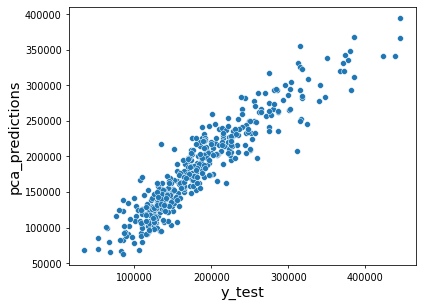

In [96]:
plt.figure(dpi=70)
g=sns.scatterplot(x=y_test,y=pca_predictions)
g.set_xlabel('y_test',fontdict={'size':15})
g.set_ylabel('pca_predictions',fontdict={'size':15})

(0.0, 50.0)

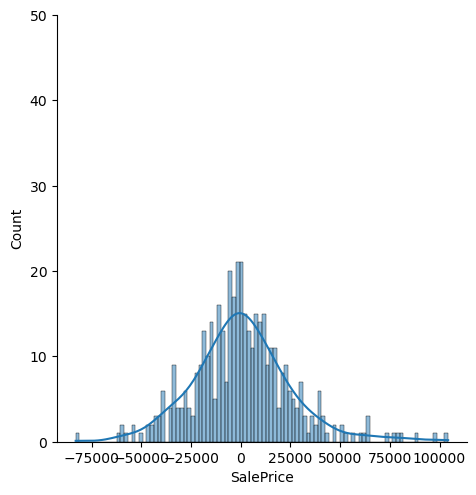

In [99]:
#DISTRIBUTION GRAPH OF RESIDUALS 
sns.displot(y_test-pca_predictions,bins=100,kde=True)
plt.ylim(0.0,50.0)

In [98]:
MAE = metrics.mean_absolute_error(y_test,pca_predictions)

MSE = metrics.mean_squared_error(y_test,pca_predictions)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,pca_predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 18344.8585318895
MSE: 624506824.2634284
RMSE: 24990.134538722046
R^2: 0.8737906092519292


#### Using Principle component analysis to compress our numerical columns to two components.This improved our model slightly reducing error and rsquared values.